<a href="https://colab.research.google.com/github/haruka20010217/class/blob/main/Seminar_Presentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip --no-cache-dir install opencv-python==4.4.0.44

     |████████████████████████████████| 49.5 MB 1.3 MB/s 
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [3]:
# 各種インポート
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib inline

画像色変換

1.グレースケール化



2.黒い部分を白に置き換え



3.全体的に緑に変換

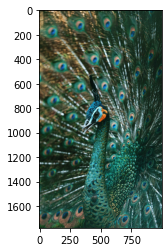

In [6]:
# 画像の読み込み
Peacock = cv2.imread('peacock.png')
rgb_Peacock = cv2.cvtColor(Peacock, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_Peacock)

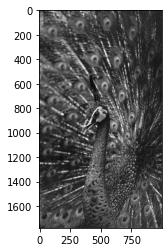

In [7]:
gray_Peacock = cv2.imread('peacock.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(gray_Peacock,cmap='gray')

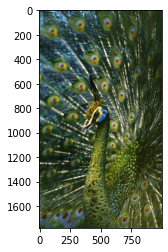

In [11]:
black = [0, 0, 0]
white = [255, 255, 255]
Peacock[np.where((Peacock == black).all(axis=2))] = white
plt.imshow(Peacock)

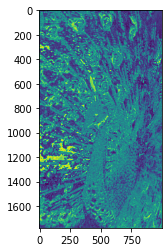

In [35]:
# h>173の画素のhを-90
Peacock[:, :, 0] = np.where(Peacock[:, :, 0]>173,Peacock[:, :, 0]-90,Peacock[:, :, 0])
plt.imshow(Peacock[:, :, 0])

アニメーション

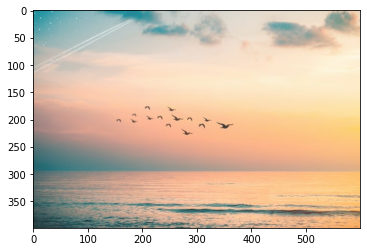

In [63]:
# 画像の読み込み
birds_org= cv2.imread('birds2.jpg')
# 画像の表示
plt.imshow(cv2.cvtColor(birds_org, cv2.COLOR_BGR2RGB))

In [64]:
birds_height, birds_width, birds_colornum = birds.shape
print(birds_height)
print(birds_width)
print(birds_colornum)

399
600
3


In [68]:
rocket_hsv = cv2.cvtColor(birds_org, cv2.COLOR_BGR2HSV)

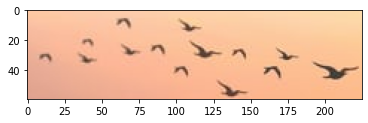

In [69]:
birds_crop = birds_org[170:230, 145:370, :]
# 切り抜いた画像の表示
plt.imshow(cv2.cvtColor(birds_crop, cv2.COLOR_BGR2RGB))

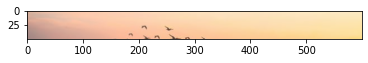

In [73]:
# 画像を縦15pxずつに区切った画像へ分割
birds_crop_list = []
for i in range(4):
    birds_crop= birds_org[50*i:50*(i+1), :, :]
    birds_crop_list.append(birds_crop)

# 下端の画像のみ表示
plt.imshow(cv2.cvtColor(birds_crop_list[3], cv2.COLOR_BGR2RGB))

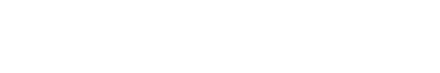

In [75]:
# 画像に関する事前設定
fig = plt.figure(figsize=(2,3), dpi=200)  # これで横800px, 縦200pxのGIF画像になる
ax = fig.add_axes([0, 0, 1, 1])  # 余白なしにする
ax.axis('off')  # グラフの軸やタイトルといった要素を非表示にする

# 4分割にした画像それぞれをRGB形式にして新しいリスト（rocket_crop_gif_list）に入れる
birds_crop_gif_list = []
for i in range(4):
    birds_crop_gif = ax.imshow(cv2.cvtColor(birds_crop_list[i], cv2.COLOR_BGR2RGB))
    birds_crop_gif_list.append([birds_crop_gif])

# アニメーションの作成
anim = animation.ArtistAnimation(fig, birds_crop_gif_list, interval=500, repeat_delay=500)

# GIF画像として保存（内部的にPillowの機能を使うようwriterで設定）
anim.save('birds_anim.gif', writer='pillow')